In [ ]:
!pip install yfinance

In [ ]:
!pip install ta

In [ ]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR


In [ ]:
def get_stock_df(stock_id, period):
  stock = yf.Ticker(stock_id)

  df = stock.history(period = period).loc[:,"Open":"Volume"]
  
  df = ta.utils.dropna(df)

  return df

In [ ]:
apple_df = get_stock_df("AAPL", "5y")
apple_df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-13 00:00:00-05:00,41.245275,41.483000,41.221501,41.357006,67928400
2017-11-14 00:00:00-05:00,41.135916,41.240516,40.693748,40.731785,99130000
2017-11-15 00:00:00-05:00,40.406117,40.489322,40.028135,40.194542,116632400
2017-11-16 00:00:00-05:00,40.693755,40.857785,40.484559,40.674740,94550000
2017-11-17 00:00:00-05:00,40.660477,40.743682,40.327664,40.448902,87598000
...,...,...,...,...,...
2022-11-07 00:00:00-05:00,137.110001,139.149994,135.669998,138.919998,83374600
2022-11-08 00:00:00-05:00,140.410004,141.429993,137.490005,139.500000,89908500
2022-11-09 00:00:00-05:00,138.500000,138.550003,134.589996,134.869995,74917800


Text(0, 0.5, 'price')

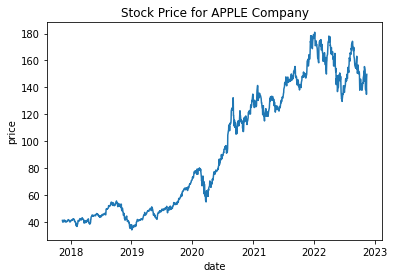

In [ ]:
plt.plot(apple_df['Close'], label='Close Price history')
plt.title('Stock Price for APPLE Company')
plt.xlabel('date')
plt.ylabel('price')

In [ ]:
def get_target_features(df, n_days=5):
  target = df["Close"][n_days:]
  target.reset_index(inplace = True, drop = True)
  
  #df = df.drop(columns="Date")

  data = df.values
  features = {}
  for i in range(n_days, len(data)):
      f = []
      for j in data[i-n_days:i, :]:
          for k in j:
              f.append(k)
      features[df.index[i]] = f
  #features = df[:-1]
  features = pd.DataFrame.from_dict(features, orient='index')
  return target, features

In [ ]:
def LRM(df, n_days=5):
    target, features = get_target_features(df, n_days)
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

    scaler = MinMaxScaler()
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test) 
    
    model = LinearRegression().fit(X = X_train, y = y_train)
    
    print("features coef are:")

    for count, i in enumerate(model.coef_):
        c = count % len(df.columns)
        print(df.columns[c], "{:.2f}".format(i))
    
    print("")  
    y_predict = model.predict(X_train)
    mse = mean_squared_error(y_train, y_predict)
    rmse = (np.sqrt(mse))
    r2 = r2_score(y_train, y_predict)

    
    print("The model performance for training set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 is {}'.format(r2))

    print("")
    y_predict = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    rmse = (np.sqrt(mse))
    r2 = r2_score(y_test, y_predict)
    print("The model performance for testing set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 is {}'.format(r2))

    print("\n")
    
    return model

In [ ]:
apple_lrm = LRM(apple_df)

features coef are:
Open 3.39
High -6.95
Low -2.54
Close -3.39
Volume -0.01
Open 9.07
High -3.24
Low 1.80
Close 12.29
Volume 0.13
Open 11.94
High -14.43
Low -17.21
Close 9.15
Volume -0.42
Open -19.95
High 35.60
Low 19.31
Close -16.49
Volume -0.13
Open -56.66
High 21.15
Low 74.99
Close 87.68
Volume 0.67

The model performance for training set
--------------------------------------
MSE is 4.3741604390314714
RMSE is 2.0914493632482407
R2 is 0.9979719158599707

The model performance for testing set
--------------------------------------
MSE is 4.951397534177647
RMSE is 2.225173596413917
R2 is 0.9978392469366824




In [ ]:
def RM(df):
    target, features = get_target_features(df)
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)
    
    scaler = MinMaxScaler()
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test) 
    
    
    param_grid = {"alpha":[0.0001,0.001,0.1,1,10,100]}
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
    grid_search.fit(X=X_train, y=y_train)
    best_params = grid_search.best_params_
    print("Best parameters: ", best_params)
    
    model = Ridge(alpha=best_params['alpha']).fit(X = X_train, y = y_train)
    
        
    print("features coef are:")

    for count, i in enumerate(model.coef_):
        c = count % len(df.columns)
        print(df.columns[c], "{:.2f}".format(i))
    
    print("")  
    y_predict = model.predict(X_train)
    mse = mean_squared_error(y_train, y_predict)
    rmse = (np.sqrt(mse))
    r2 = r2_score(y_train, y_predict)

    
    print("The model performance for training set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 is {}'.format(r2))

    print("")
    y_predict = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    rmse = (np.sqrt(mse))
    r2 = r2_score(y_test, y_predict)
    print("The model performance for testing set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 is {}'.format(r2))

    print("\n")

    return model

In [ ]:
apple_ridgem = RM(apple_df)

Best parameters:  {'alpha': 0.001}
features coef are:
Open 2.73
High -6.07
Low -2.57
Close -3.17
Volume -0.03
Open 7.76
High -2.76
Low 2.57
Close 11.88
Volume 0.13
Open 10.62
High -13.32
Low -15.60
Close 8.00
Volume -0.41
Open -17.02
High 31.56
Low 17.74
Close -14.53
Volume -0.08
Open -53.04
High 20.30
Low 71.60
Close 88.91
Volume 0.62

The model performance for training set
--------------------------------------
MSE is 4.374864160460531
RMSE is 2.0916175942223596
R2 is 0.9979715895787816

The model performance for testing set
--------------------------------------
MSE is 4.953036021432065
RMSE is 2.2255417366187644
R2 is 0.997838531913029




In [ ]:
def LM(df):
    target, features = get_target_features(df)
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

    scaler = MinMaxScaler()
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test) 

        
    param_grid = {"alpha":[0.0001,0.001,0.1,1,10,100]}
    grid_search = GridSearchCV(Lasso(max_iter = 10000000), param_grid, cv=5)
    grid_search.fit(X=X_train, y=y_train)
    best_params = grid_search.best_params_
    print("Best parameters: ", best_params)
    
    model = Lasso(alpha=best_params['alpha'], max_iter = 10000000).fit(X = X_train, y = y_train)
        
    print("features coef are:")

    for count, i in enumerate(model.coef_):
        c = count % len(df.columns)
        print(df.columns[c], "{:.2f}".format(i))
    
    print("")  
    y_predict = model.predict(X_train)
    mse = mean_squared_error(y_train, y_predict)
    rmse = (np.sqrt(mse))
    r2 = r2_score(y_train, y_predict)

    
    print("The model performance for training set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 is {}'.format(r2))

    print("")
    y_predict = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    rmse = (np.sqrt(mse))
    r2 = r2_score(y_test, y_predict)
    print("The model performance for testing set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 is {}'.format(r2))

    print("\n")

    return model

In [ ]:
apple_lm = LM(apple_df)

Best parameters:  {'alpha': 0.001}
features coef are:
Open -0.00
High -0.00
Low -0.00
Close -0.00
Volume -0.00
Open 0.00
High 0.00
Low 0.00
Close 6.40
Volume -0.05
Open 0.00
High 0.00
Low 0.00
Close 0.00
Volume -0.30
Open 0.00
High 2.77
Low 0.00
Close 0.00
Volume 0.00
Open -24.02
High 1.24
Low 65.80
Close 93.82
Volume 0.81

The model performance for training set
--------------------------------------
MSE is 4.438836203099959
RMSE is 2.1068545756885926
R2 is 0.9979419288731695

The model performance for testing set
--------------------------------------
MSE is 4.976303727807277
RMSE is 2.230763037125924
R2 is 0.9978283780589949




In [ ]:
def SVMM(df):
    target, features = get_target_features(df)
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

    scaler = MinMaxScaler()
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test) 

    param_grid = {"C":[0.001, 0.1, 1, 10, 100, 1000, 1000, 2000, 5000]}
    grid_search = GridSearchCV(LinearSVR(max_iter = 1000000), param_grid, cv=5)
    grid_search.fit(X=X_train, y=y_train)
    best_params = grid_search.best_params_
    print("Best parameters: ", best_params)
    
    
    model = LinearSVR(C = best_params['C'], max_iter = 1000000).fit(X = X_train, y = y_train)

        
    print("features coef are:")

    for count, i in enumerate(model.coef_):
        c = count % len(df.columns)
        print(df.columns[c], "{:.2f}".format(i))
    
    print("")  
    y_predict = model.predict(X_train)
    mse = mean_squared_error(y_train, y_predict)
    rmse = (np.sqrt(mse))
    r2 = r2_score(y_train, y_predict)

    
    print("The model performance for training set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 is {}'.format(r2))

    print("")
    y_predict = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    rmse = (np.sqrt(mse))
    r2 = r2_score(y_test, y_predict)
    print("The model performance for testing set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 is {}'.format(r2))

    print("\n")

    return model

In [ ]:
apple_svmm = SVMM(apple_df)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Best parameters:  {'C': 1000}
features coef are:
Open -1.01
High 13.25
Low 1.79
Close -14.39
Volume 0.04
Open 7.64
High -24.33
Low 8.68
Close 17.45
Volume -0.00
Open -1.12
High -2.84
Low -5.12
Close -9.13
Volume 0.12
Open -16.00
High 40.46
Low 18.25
Close -20.51
Volume 0.11
Open -29.34
High 14.96
Low 34.49
Close 112.71
Volume 0.01

The model performance for training set
--------------------------------------
MSE is 4.465344668247489
RMSE is 2.113136216207438
R2 is 0.9979296381951087

The model performance for testing set
--------------------------------------
MSE is 5.001636577201826
RMSE is 2.2364338973468065
R2 is 0.9978173229919045




Text(0, 0.5, 'price')

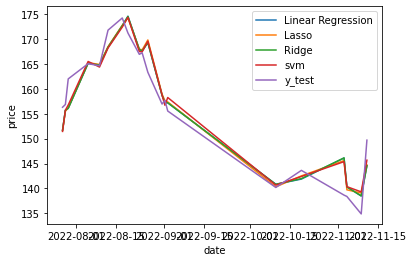

In [ ]:


for name, model in {"Linear Regression": apple_lrm, "Lasso": apple_lm, "Ridge": apple_ridgem, "svm":apple_svmm}.items():
    target, features = get_target_features(apple_df)
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)
    
    prediction = X_test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(X_train) 
    X_test = scaler.transform(X_test) 
    

    y_predict = model.predict(X_test)
    prediction["actual"] = list(y_test)
    prediction["prid"] = y_predict
    prediction = prediction.sort_index()

    y_test = prediction["actual"]
    y_predict = prediction["prid"]


    plt.plot(y_predict[-20:], label=name)


plt.plot(y_test[-20:], label="y_test")
plt.legend(loc="best")
plt.xlabel("date")
plt.ylabel('price')